In [5]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

import seaborn
%matplotlib inline

from tqdm import tqdm

import bandits
import simulation
from evaluation import evaluate_bandit

In [150]:
import sklearn
from sklearn.linear_model import LogisticRegression

X = np.arange(15, dtype=np.float).reshape(3,5)
y = np.array([1,0,0]).astype(np.float)
clf = LogisticRegression()
clf.fit(X, y)
print clf.predict_proba(X)

# Values is a dictionary with whatever values we have data for among x_1, x_2... x_n, some x_i may not be defined
# Fill will assign a value of -9 for any undefined x_i
def fill(values, no_features):
    for i in range(no_features):
        if i in values:
            continue
        else:
            values[i] = -9

[[ 0.29308009  0.70691991]
 [ 0.90591639  0.09408361]
 [ 0.99554826  0.00445174]]


In [6]:
import numpy as np
from scipy.stats import beta

class SimpleSimulator:

    def __init__(self, n_arms, prior=(.5, .5)):
        self.arm_probs = {}
        temp_val_list = []
        self.n_arms = n_arms
        self.prior = prior
        for i in range (0, n_arms):
            temp_val = beta(self.prior[0], self.prior[1]).rvs()
            temp_val_list.append(temp_val)
        for i in range (0, n_arms):
            self.arm_probs[i] = temp_val_list[i]
    
    def get_available_arms(self):
        return self.arm_probs.keys(), []
    
    def get_reward(self, arm_id, n_pulls=1):
        reward_list = scipy.stats.bernoulli.rvs(self.arm_probs.get(arm_id, 0), size=n_pulls)
        return reward_list
    

In [7]:
reload(bandits)

<module 'bandits' from 'bandits.pyc'>

In [5]:
import bandits

test = bandits.BetaBandit()

In [8]:
TIME_STEPS = 10000
N_ARMS = 10
# Arms, Prior = (alpha, beta)
sim = SimpleSimulator(N_ARMS, (1,1))

mab_dict = {}

mab_dict['EGreedy'] = bandits.EGreedyMAB()
mab_dict['Beta_neutral_strong_prior'] = bandits.BetaBandit(2, (10,10))
mab_dict['Beta_neutral_weak_prior'] = bandits.BetaBandit(2, (1,1))
mab_dict['Beta_optimistic_strong'] = bandits.BetaBandit(2, (15, 5))
mab_dict['Beta_optimistic_weak'] = bandits.BetaBandit(2,(.2, .1))
mab_dict['Beta_pessimistic_weak'] = bandits.BetaBandit(2,(.1, .2))
mab_dict['Beta_pessimistic_strong'] = bandits.BetaBandit(2,(5, 15))

results_dict = {k:0 for k in mab_dict}

mab_reward = {}
results_dict = {}
TRIALS = 5
names_of_priors = ['EGreedy', 'Beta_neutral_strong_prior','Beta_neutral_weak_prior','Beta_optimistic_strong', 
                   'Beta_optimistic_weak', 'Beta_pessimistic_weak','Beta_pessimistic_strong']
accumulated_reward = {names_of_priors[i]: [] for i in range(len(names_of_priors))}
avg_accumulated_reward = {names_of_priors[i]: [] for i in range(len(names_of_priors))}


for mab_name in mab_dict:
    T = 100
    total_reward = 0
    for i in np.arange(TRIALS):
        mab = mab_dict[mab_name]
        current_reward, t = evaluate_bandit(sim, mab, T)
        total_reward += current_reward
        accumulated_reward[mab_name].append(total_reward)
    avg_accumulated_reward[mab_name].append(total_reward/TRIALS)
print avg_accumulated_reward
print accumulated_reward
    


{'Beta_pessimistic_strong': [88.400000000000006], 'Beta_neutral_strong_prior': [98.400000000000006], 'Beta_optimistic_strong': [99.599999999999994], 'Beta_pessimistic_weak': [99.200000000000003], 'EGreedy': [97.400000000000006], 'Beta_optimistic_weak': [99.200000000000003], 'Beta_neutral_weak_prior': [99.200000000000003]}
{'Beta_pessimistic_strong': [88.0, 180.0, 272.0, 357.0, 442.0], 'Beta_neutral_strong_prior': [92.0, 192.0, 292.0, 392.0, 492.0], 'Beta_optimistic_strong': [98.0, 198.0, 298.0, 398.0, 498.0], 'Beta_pessimistic_weak': [96.0, 196.0, 296.0, 396.0, 496.0], 'EGreedy': [95.0, 195.0, 293.0, 392.0, 487.0], 'Beta_optimistic_weak': [96.0, 196.0, 296.0, 396.0, 496.0], 'Beta_neutral_weak_prior': [96.0, 196.0, 296.0, 396.0, 496.0]}


In [49]:
#max_payoff = max(sim.arm_probs.values())
#print 'best possible', max_payoff



plot accumulated reward/time (so graph looks like a log)
divide accumulatd reward at each time step by time step

In [14]:
accumulated_reward[name]

[88.0, 180.0, 272.0, 357.0, 442.0]

In [17]:
np.cumsum(accumulated_reward[name])

array([   88.,   268.,   540.,   897.,  1339.])

In [19]:
len(np.arange(1, TIME_STEPS+1.0))


10000

In [16]:
np.cumsum(accumulated_reward[name])   / np.arange(1, TIME_STEPS+1.0)


ValueError: operands could not be broadcast together with shapes (5,) (10000,) 

In [12]:
max_payoff = max(sim.arm_probs.values())
import matplotlib.pyplot as plt

for name in accumulated_reward:
    x_vals = np.arange(len(accumulated_reward[name])+1)
    y_vals = np.arange(np.cumsum(accumulated_reward[name]/np.arange(1, TIME_STEPS+1.0)))
    label = accumulated_reward[name]
    plt.plot(x_vals, y_vals, label = label, loc = 'lower right')
    #plt.xlabel("Time Step", fontsize=14)

    #plt.ylabel("Cumulative Reward", fontsize=14)


ValueError: operands could not be broadcast together with shapes (5,) (10000,) 

In [ ]:
np.random.rand()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

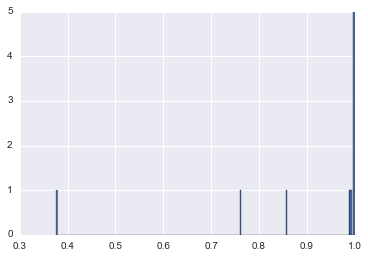

In [140]:
plt.hist(sim.arm_probs.values(), 200,None)

In [141]:
x = range(N_ARMS)
y = played[0]
plt.plot(x,y)
for p in played:
    print p

NameError: name 'played' is not defined